# Imports

In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.gen_functions import *
from src.data.weather_data import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.features.landuse import *
from src.visualization.vis_data import *
from src.visualization.vis_model import show_fea_imp, plot_model_perf
from src.visualization.mapper import *
from src.data.fire_data import cal_repeat_spots_ex_year, cal_repeat_spots

from src.models.train_model import *
from src.models.predict_model import * 
 

import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Search for the weather station in the database.

In [2]:
# starting from init the map object
mapper = Mapper()
mapper.load_()

# add map setting to add center of the map
mapper.set_map_params(center_city='Bangkok')
mapper.build_station_info()

number of stations = (2755, 30)
Countries ['Thailand' nan 'India' 'China' 'Indonesia' 'Malaysia' 'Bangladesh'
 'Vietnam' 'Myanmar' 'Brunei Darussalam' 'Cambodia' 'Bhutan' 'Laos']


In [3]:
# starting from init the map object
mapper = Mapper()
mapper.load_()

In [4]:
mapper.all_station_info.head()

,id,nameTH,nameEN,areaTH,areaEN,stationType,Latitude,Longitude,forecast,LastUpdate,...,Region,Region (ASCII),Population,Time Zone,Max Latitude,Max Longitude,Min Latitude,Min Longitude,long_km,lat_km
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,[],"{'date': '2022-05-20', 'time': '15:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,[],"{'date': '2022-05-20', 'time': '15:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05t,กรมอุตุนิยมวิทยาบางนา,Thai Meteorological Department,"แขวงบางนา เขตบางนา, กรุงเทพฯ","Bang Na, Khet Bang Na, Bangkok",GROUND,13.666183,100.605742,[],"{'date': '2022-05-20', 'time': '15:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10t,เคหะชุมชนคลองจั่น,National Housing Authority Klongchan,"แขวงคลองจั่น เขตบางกะปิ, กรุงเทพฯ","Khlong Chan, Khet Bang Kapi, Bangkok",GROUND,13.779873,100.646009,[],"{'date': '2022-05-20', 'time': '15:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.775530,100.569195,[],"{'date': '2022-05-20', 'time': '15:00', 'PM25'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mapper.all_station_info.columns

Index(['id', 'nameTH', 'nameEN', 'areaTH', 'areaEN', 'stationType', 'Latitude',
       'Longitude', 'forecast', 'LastUpdate', 'long_m', 'lat_m', 'Country',
       'City', 'source', 'dustboy_uri', 'dustboy_name_th', 'dustboy_name_en',
       'dustboy_version', 'City (ASCII)', 'Region', 'Region (ASCII)',
       'Population', 'Time Zone', 'Max Latitude', 'Max Longitude',
       'Min Latitude', 'Min Longitude', 'long_km', 'lat_km'],
      dtype='object')

In [19]:
mapper.all_station_info['source'].unique()

array(['TH_PCD', 'TH_BKP', 'TH_CMU', 'Berkeley', 'US_emb'], dtype=object)

In [20]:
mapper.all_station_info[mapper.all_station_info['source'] == 'Berkeley'].head()

,id,nameTH,nameEN,areaTH,areaEN,stationType,Latitude,Longitude,forecast,LastUpdate,...,Region,Region (ASCII),Population,Time Zone,Max Latitude,Max Longitude,Min Latitude,Min Longitude,long_km,lat_km
579,berk0,NaN,NaN,NaN,NaN,NaN,30.1445,74.1955,NaN,NaN,...,Punjab,Punjab,130603.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
580,berk1,NaN,NaN,NaN,NaN,NaN,24.4801,72.7819,NaN,NaN,...,Rajasthan,Rajasthan,50262.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
581,berk2,NaN,NaN,NaN,NaN,NaN,21.2567,77.5101,NaN,NaN,...,Maharashtra,Maharashtra,111278.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN
582,berk3,NaN,NaN,NaN,NaN,NaN,45.5455,126.9770,NaN,NaN,...,Heilongjiang,Heilongjiang,144665.0,Asia/Shanghai,NaN,NaN,NaN,NaN,NaN,NaN
583,berk4,NaN,NaN,NaN,NaN,NaN,19.6720,78.5359,NaN,NaN,...,Telangana,Telangana,118526.0,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mapper.all_station_info['Country'].unique()

array(['Thailand', nan, 'India', 'China', 'Indonesia', 'Malaysia',
       'Bangladesh', 'Vietnam', 'Myanmar', 'Brunei Darussalam',
       'Cambodia', 'Bhutan', 'Laos'], dtype=object)

In [5]:
mapper.all_station_info[mapper.all_station_info['Country'] == 'Cambodia'] 

,id,nameTH,nameEN,areaTH,areaEN,stationType,Latitude,Longitude,forecast,LastUpdate,...,Region,Region (ASCII),Population,Time Zone,Max Latitude,Max Longitude,Min Latitude,Min Longitude,long_km,lat_km
750,berk169,NaN,NaN,NaN,NaN,NaN,13.1027,103.1982,NaN,NaN,...,Battambang,Battambang,150444.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
1457,berk876,NaN,NaN,NaN,NaN,NaN,12.2500,104.6667,NaN,NaN,...,Kampong Chhnang,Kampong Chhnang,75244.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
1959,berk1378,NaN,NaN,NaN,NaN,NaN,13.6580,102.5636,NaN,NaN,...,Banteay Meanchey,Banteay Meanchey,79000.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
2050,berk1469,NaN,NaN,NaN,NaN,NaN,12.5388,103.9192,NaN,NaN,...,Pursat,Pursat,52476.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
2285,berk1704,NaN,NaN,NaN,NaN,NaN,13.3618,103.8606,NaN,NaN,...,Siem Reap,Siem Reap,139458.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
2286,berk1705,NaN,NaN,NaN,NaN,NaN,10.6093,103.5296,NaN,NaN,...,Preah Sihanouk,Preah Sihanouk,156691.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
2379,berk1798,NaN,NaN,NaN,NaN,NaN,10.9908,104.7850,NaN,NaN,...,Takeo,Takeo,843931.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN
2410,berk1829,NaN,NaN,NaN,NaN,NaN,11.4833,104.9500,NaN,NaN,...,Kandal,Kandal,52066.0,Asia/Phnom_Penh,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
mapper.all_station_info[mapper.all_station_info['Country'] == 'Cambodia']['Region'].unique()

array(['Battambang', 'Kampong Chhnang', 'Banteay Meanchey', 'Pursat',
       'Siem Reap', 'Preah Sihanouk', 'Takeo', 'Kandal'], dtype=object)

# Add a weather stations

In [2]:
station_list = ['https://www.wunderground.com/history/daily/kh/battambang/VDBG/date/2009-3-27' ] 
station_list = ['https://www.wunderground.com/history/daily/kh/prey-nob-district/VDSV/date/2021-5-11']
add_weather_station(station_list)

add  Prey Nob District


In [3]:
w_folder = '../data/weather_cities/'

filename = w_folder + 'weather_station_info.json'
with open(filename) as f:
    station_info = json.load(f)

station_info = pd.DataFrame(station_info)

In [4]:
station_info[station_info['country'] == 'Cambodia']

,city_name,province,country,station_name,specific_url,latitude,longitude
8,Siem Reap District,Siem Reap Province,Cambodia,Siem Reap International Airport Station,kh/siem-reap-district/,13.41 °N,103.81 °E
9,Phnom Penh,,Cambodia,Phnom Penh International Airport Station,kh/phnom-penh/,11.55 °N,104.84 °E
44,Battambang,Battambang,Cambodia,Battambang Airport Station,kh/battambang/,13.1 °N,103.21 °E
45,Prey Nob District,Sihanoukville,Cambodia,Sihanoukville International Airport Station,kh/prey-nob-district/,10.58 °N,103.65 °E


In [29]:
station_info[station_info['country'] == 'Thailand']

,city_name,province,country,station_name,specific_url,latitude,longitude
0,Mueang Chiang Mai,Chiang Mai,Thailand,Chiang Mai International Airport Station,th/mueang-chiang-mai/,18.8 °N,98.97 °E
1,Mueang Chiang Rai,Chiang Rai,Thailand,Chiang Rai Station,th/mueang-chiang-rai/,19.91 °N,99.83 °E
2,Mueang Tak,Tak,Thailand,Tak Airport Station,th/mueang-tak/,16.87 °N,99.13 °E
3,Mueang Mae Hong Son,Mae Hong Son,Thailand,Mae Hong Son Airport Station,th/mueang-mae-hong-son/,19.3 °N,97.97 °E
4,Mueang Nan,Nan,Thailand,Nan Airport Station,th/mueang-nan/,18.78 °N,100.77 °E
5,Sawankhalok,Sukhothai,Thailand,Sukhothai Airport Station,th/sawankhalok/,17.31 °N,99.83 °E
6,Bangkok,Bangkok Metropolitan Region,Thailand,Don Mueang International Airport Station,th/bangkok/,13.91 °N,100.59 °E
21,Mueang Nakhon Si Thammarat,Nakhon Si Thammarat,Thailand,Nakhon Si Thammarat Airport Station,th/mueang-nakhon-si-thammarat/,8.44 °N,99.97 °E
22,Chaloem Phra Kiat,Nakhon Ratchasima,Thailand,Nakhon Ratchasima Airport Station,th/chaloem-phra-kiat/,15.01 °N,102.41 °E
23,Khlong Hoi Khong,Songkhla,Thailand,Hat Yai International Airport Station,th/khlong-hoi-khong/,6.9 °N,100.38 °E


In [5]:
city_names = ['Battambang' ]
city_names = ['Prey Nob District']

weather_station_info = find_weather_stations(city_names, weather_json_file=w_folder+'weather_station_info.json')
len(weather_station_info)

1

In [6]:
weather_station_info

[{'city_name': 'Prey Nob District',
  'province': 'Sihanoukville',
  'country': 'Cambodia',
  'station_name': 'Sihanoukville International Airport Station',
  'specific_url': 'kh/prey-nob-district/',
  'latitude': '10.58 °N',
  'longitude': '103.65 °E'}]

In [7]:
w_folder = '../data/weather_cities/' 

In [8]:
years_list = np.arange(2016, 2023)
years_list = years_list[::-1]
years_list

array([2022, 2021, 2020, 2019, 2018, 2017, 2016])

In [ ]:
for year in years_list:
    for city_json in tqdm(weather_station_info):
        
        start_date = datetime(year,1,1)
        if year == 2022:
            end_date = datetime.now()
        else:
            end_date = datetime(year+1,1,1)
        #end_date = datetime.now()
        update_weather(city_json, data_folder=w_folder, start_date=start_date, end_date=end_date)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 131



0it [00:00, ?it/s]
1it [00:21, 21.42s/it]
2it [00:36, 19.43s/it]
3it [00:50, 17.76s/it]
4it [01:04, 16.62s/it]
5it [01:17, 15.74s/it]
6it [01:30, 14.95s/it]
7it [01:45, 14.95s/it]
8it [02:03, 15.65s/it]
9it [02:20, 16.06s/it]
10it [02:35, 15.93s/it]
11it [02:52, 16.17s/it]
12it [03:10, 16.72s/it]
13it [03:30, 17.70s/it]
14it [03:44, 16.48s/it]
15it [04:03, 17.51s/it]
16it [04:19, 16.82s/it]
17it [04:32, 15.72s/it]
18it [04:45, 14.97s/it]
19it [05:01, 15.16s/it]
20it [05:15, 14.81s/it]
21it [05:31, 15.35s/it]
22it [05:44, 14.65s/it]
23it [07:23, 39.87s/it]
24it [07:37, 32.15s/it]
25it [07:51, 26.59s/it]
26it [08:06, 23.31s/it]
27it [08:19, 20.13s/it]
28it [08:31, 17.70s/it]
29it [08:44, 16.24s/it]
30it [08:57, 15.24s/it]
31it [09:10, 14.57s/it]
32it [09:24, 14.38s/it]
33it [09:37, 13.93s/it]
34it [09:50, 13.79s/it]
35it [10:03, 13.62s/it]
36it [10:17, 13.47s/it]
37it [10:30, 13.36s/it]
38it [10:43, 13.48s/it]
39it [10:58, 13.76s/it]
40it [11:11, 13.66s/it]
41it [11:25, 13.84s/it]
42it 

new_weather shape (6037, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 365



0it [00:00, ?it/s]
1it [00:13, 13.07s/it]
2it [00:25, 12.87s/it]
3it [00:37, 12.68s/it]
4it [00:50, 12.81s/it]
5it [01:06, 13.73s/it]
6it [01:20, 13.61s/it]
7it [01:32, 13.31s/it]
8it [01:45, 13.29s/it]
9it [02:00, 13.65s/it]
10it [02:19, 15.22s/it]
11it [02:33, 14.80s/it]
12it [02:45, 13.99s/it]
13it [02:58, 13.65s/it]
14it [03:10, 13.36s/it]
15it [03:24, 13.36s/it]
16it [03:37, 13.31s/it]
17it [03:50, 13.14s/it]
18it [04:04, 13.55s/it]
19it [04:19, 13.83s/it]
20it [04:31, 13.46s/it]
21it [06:08, 38.60s/it]
22it [06:23, 31.45s/it]
23it [06:37, 26.10s/it]
24it [06:49, 22.09s/it]
25it [07:04, 19.87s/it]
26it [07:17, 17.85s/it]
27it [07:31, 16.67s/it]
28it [07:47, 16.28s/it]
29it [08:03, 16.20s/it]
30it [08:16, 15.28s/it]
31it [08:29, 14.74s/it]
32it [08:43, 14.48s/it]
33it [08:57, 14.41s/it]
34it [09:10, 14.03s/it]
35it [09:26, 14.33s/it]
36it [09:41, 14.60s/it]
37it [09:56, 14.76s/it]
38it [10:12, 15.22s/it]
39it [10:28, 15.26s/it]
40it [10:41, 14.66s/it]
41it [10:56, 14.86s/it]
42it 

new_weather shape (16813, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 366



0it [00:00, ?it/s]
1it [00:12, 12.81s/it]
2it [00:27, 13.48s/it]
3it [00:40, 13.32s/it]
4it [00:53, 13.10s/it]
5it [01:06, 13.07s/it]
6it [01:18, 12.88s/it]
7it [01:32, 13.17s/it]
8it [01:48, 13.84s/it]
9it [02:05, 15.06s/it]
10it [02:18, 14.21s/it]
11it [02:31, 14.06s/it]
12it [02:45, 13.85s/it]
13it [02:58, 13.75s/it]
14it [03:12, 13.60s/it]
15it [03:25, 13.49s/it]
16it [03:45, 15.57s/it]
17it [04:00, 15.33s/it]
18it [04:15, 15.21s/it]
19it [04:30, 15.24s/it]
20it [04:44, 14.73s/it]
21it [05:00, 15.22s/it]
22it [05:17, 15.74s/it]
23it [05:33, 15.76s/it]
24it [05:48, 15.62s/it]
25it [06:03, 15.49s/it]
26it [06:21, 16.19s/it]
27it [06:36, 15.79s/it]
28it [06:56, 16.94s/it]
29it [07:12, 16.84s/it]
30it [07:27, 16.30s/it]
31it [07:42, 15.97s/it]
32it [07:55, 15.02s/it]
33it [08:21, 18.20s/it]
34it [08:35, 16.99s/it]
35it [08:48, 15.72s/it]
36it [09:01, 14.87s/it]
37it [09:14, 14.41s/it]
38it [09:30, 14.81s/it]
39it [09:43, 14.26s/it]
40it [09:56, 13.90s/it]
41it [10:09, 13.75s/it]
42it 

new_weather shape (15925, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 365



0it [00:00, ?it/s]
1it [00:14, 14.26s/it]
2it [00:26, 13.74s/it]
3it [00:39, 13.54s/it]
4it [00:52, 13.20s/it]
5it [01:04, 13.04s/it]
6it [01:19, 13.44s/it]
7it [01:34, 13.84s/it]
8it [01:47, 13.75s/it]
9it [02:00, 13.56s/it]
10it [02:13, 13.46s/it]
11it [02:27, 13.36s/it]
12it [02:39, 13.08s/it]
13it [02:52, 13.12s/it]
14it [03:06, 13.37s/it]
15it [03:19, 13.12s/it]
16it [03:33, 13.35s/it]
17it [03:46, 13.33s/it]
18it [03:59, 13.34s/it]
19it [04:13, 13.61s/it]
20it [05:08, 25.85s/it]
21it [05:23, 22.64s/it]
22it [05:35, 19.57s/it]
23it [05:49, 17.71s/it]
24it [06:02, 16.24s/it]
25it [06:17, 15.87s/it]
26it [06:31, 15.44s/it]
27it [06:44, 14.65s/it]
28it [06:56, 13.96s/it]
29it [07:09, 13.54s/it]
30it [07:23, 13.64s/it]
31it [07:36, 13.58s/it]
32it [07:49, 13.23s/it]
33it [08:01, 12.99s/it]
34it [08:13, 12.81s/it]
35it [08:26, 12.83s/it]
36it [08:45, 14.67s/it]
37it [08:58, 14.15s/it]
38it [09:15, 14.90s/it]
39it [09:28, 14.48s/it]
40it [09:41, 13.94s/it]
41it [09:56, 14.40s/it]
42it 

new_weather shape (15525, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 365



0it [00:00, ?it/s]
1it [00:13, 13.13s/it]
2it [00:27, 13.44s/it]
3it [00:39, 13.19s/it]
4it [00:53, 13.19s/it]
5it [01:07, 13.68s/it]
6it [01:21, 13.52s/it]
7it [01:34, 13.38s/it]
8it [01:47, 13.48s/it]
9it [02:04, 14.32s/it]
10it [02:19, 14.50s/it]
11it [02:31, 14.00s/it]
12it [02:45, 14.02s/it]
13it [02:59, 14.01s/it]
14it [03:15, 14.34s/it]
15it [03:29, 14.41s/it]
16it [03:45, 14.78s/it]
17it [03:59, 14.61s/it]
18it [04:14, 14.61s/it]
19it [04:31, 15.44s/it]
20it [04:44, 14.84s/it]
21it [04:57, 14.06s/it]
22it [05:09, 13.58s/it]
23it [06:25, 32.38s/it]
24it [06:40, 26.98s/it]
25it [06:54, 23.07s/it]
26it [08:55, 52.41s/it]
27it [09:08, 40.62s/it]
28it [10:50, 59.06s/it]
29it [11:02, 45.12s/it]
30it [11:15, 35.39s/it]
31it [11:27, 28.50s/it]
32it [11:40, 23.80s/it]
33it [11:55, 21.11s/it]
34it [12:11, 19.43s/it]
35it [12:24, 17.71s/it]
36it [12:38, 16.55s/it]
37it [12:56, 17.04s/it]
38it [13:10, 15.99s/it]
39it [13:24, 15.43s/it]
40it [13:44, 16.73s/it]
41it [14:01, 16.79s/it]
42it 

new_weather shape (14695, 11)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

updateing file: ../data/weather_cities/Prey_Nob_District.csv
missing date 365



0it [00:00, ?it/s]
1it [00:14, 14.87s/it]
2it [00:32, 15.62s/it]
3it [00:45, 14.86s/it]
4it [00:58, 14.24s/it]
5it [01:10, 13.56s/it]
6it [01:23, 13.47s/it]
7it [01:36, 13.31s/it]
8it [01:49, 13.19s/it]
9it [02:02, 13.14s/it]
10it [02:15, 13.12s/it]
11it [02:28, 13.20s/it]
12it [02:41, 13.03s/it]
13it [02:54, 13.18s/it]
14it [03:10, 14.05s/it]
15it [03:23, 13.71s/it]
16it [03:38, 13.88s/it]
17it [03:52, 14.02s/it]
18it [04:07, 14.33s/it]
19it [04:22, 14.60s/it]
20it [04:39, 15.14s/it]
21it [04:53, 14.88s/it]
22it [05:09, 15.16s/it]
23it [05:21, 14.21s/it]
24it [05:37, 14.87s/it]
25it [05:51, 14.72s/it]
26it [06:07, 15.05s/it]
27it [06:24, 15.53s/it]
28it [06:40, 15.53s/it]
29it [06:53, 14.92s/it]
30it [07:05, 14.04s/it]
31it [07:21, 14.68s/it]
32it [07:39, 15.57s/it]
33it [07:56, 16.15s/it]
34it [08:11, 15.82s/it]
35it [08:30, 16.57s/it]
36it [08:45, 16.31s/it]
37it [09:03, 16.66s/it]
38it [09:15, 15.45s/it]
39it [09:33, 15.97s/it]
40it [09:50, 16.45s/it]
41it [10:08, 16.76s/it]
42it 

## Add weather from OpenWeatherMap (optional)

In [7]:
op_wea_folders = ['C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Chaloem_Phra_Kiat\\', 
                  'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\East_Jakarta\\', 
                 'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Mueang_Nakhon_Si_Thammarat\\',
                 'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities\\Soc_Son\\']

city_names = [s.split('\\')[-2] for s in op_wea_folders]
city_names

['Chaloem_Phra_Kiat', 'East_Jakarta', 'Mueang_Nakhon_Si_Thammarat', 'Soc_Son']

In [8]:
# weather data 
city_name = 'Chaloem_Phra_Kiat'
city_name = city_names[3]
print(city_name)
final_filename = f'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities/{city_name}.csv'
try: 
    wea = pd.read_csv(final_filename)
    wea['datetime'] = pd.to_datetime(wea['datetime'])
    
except:
    wea = pd.DataFrame()

Soc_Son


In [11]:
folder = f'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/weather_cities/{city_name}/'
files = glob(folder+'*.csv')
# process data from OpenWeatherMap.org 
wea_df = pd.read_csv(files[0])
wea_df = proc_open_weather(wea_df)

In [12]:
new_wea = pd.concat([wea_df,wea])
new_wea = new_wea.sort_values(['datetime'], ignore_index=True)
new_wea = new_wea.drop_duplicates('datetime')

In [13]:
new_wea.head()

,datetime,Time,Temperature(C),Humidity(%),Wind,Wind_Speed(kmph),Pressure(hPa),Precip.(mm),Condition,Dew_Point(C),Wind_Gust(kmph)
0,2000-01-01 07:00:00,07:00 AM,17.55,93.0,SE,7.2,1017.0,0.0,Mist,NaN,NaN
2,2000-01-01 08:00:00,08:00 AM,17.95,93.0,E,7.2,1018.0,0.0,Mist,NaN,NaN
4,2000-01-01 09:00:00,09:00 AM,18.78,93.0,E,7.2,1018.0,0.0,Mist,NaN,NaN
6,2000-01-01 10:00:00,10:00 AM,18.82,90.0,SSE,7.2,1019.0,0.0,Mist,NaN,NaN
8,2000-01-01 11:00:00,11:00 AM,19.88,88.0,SSE,3.6,1018.0,0.0,Mist,NaN,NaN


# Analyze the Data

In [38]:
# init a dataset object and build the data from scratch 
# only perform this when new data files are added 
dataset = Dataset('Battambang')

# build pollution,  weather data and (optional) fire data
dataset.build_all_data( build_fire=True, build_holiday=True)

Averaging data from 1 stations
Loading all hotspots data. This might take sometimes


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:48<00:00,  1.47s/it]


before drop (3129158, 20)
after drop (3081543, 12)


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:26<00:00,  1.27it/s]


before drop (3129158, 20)
after drop (3081543, 12)
Getting holiday for  cambodia


In [56]:
dataset.load_()

In [39]:
# Extract the pollution data 
poll_df = dataset.poll_df
city_name = dataset.city_name

In [41]:
poll_df.head()

,PM2.5
datetime,
2016-12-06 11:00:00,32.0
2016-12-06 12:00:00,25.0
2016-12-06 13:00:00,24.0
2016-12-06 14:00:00,25.0
2016-12-06 15:00:00,32.0


pollutants to plot Index(['PM2.5'], dtype='object')


(0.0, 100.0)

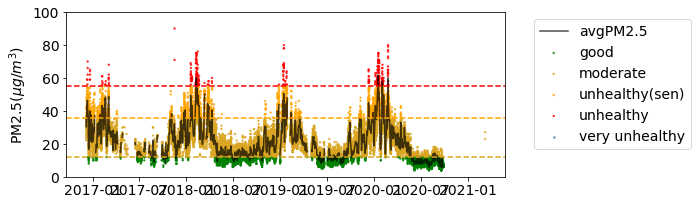

In [45]:
# looking at the raw data
ax = plot_all_pollutions(poll_df, city_name=city_name, filename=dataset.report_folder +'all_poll.png')
ax.set_ylim([0, 100])

PM2.5    152.666667
dtype: float64


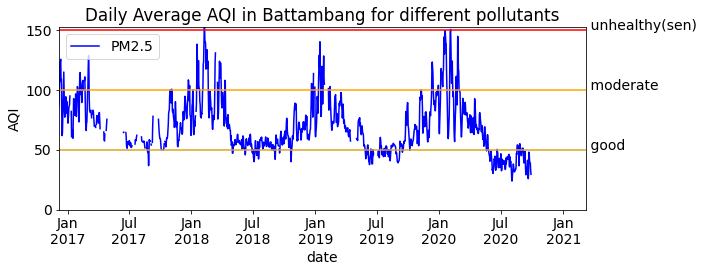

In [46]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

aqi 100 in  Dec-11 to Mar-18


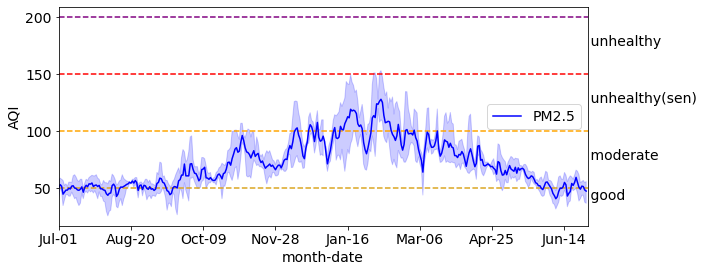

In [47]:
ax, winterday_dict = plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5')
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)

plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25_aqi.png')

In [48]:
winterday_dict

{'159': 'Dec-06',
 '160': 'Dec-07',
 '161': 'Dec-08',
 '162': 'Dec-09',
 '163': 'Dec-10',
 '164': 'Dec-11',
 '165': 'Dec-12',
 '166': 'Dec-13',
 '167': 'Dec-14',
 '168': 'Dec-15',
 '169': 'Dec-16',
 '170': 'Dec-17',
 '171': 'Dec-18',
 '172': 'Dec-19',
 '173': 'Dec-20',
 '174': 'Dec-21',
 '175': 'Dec-22',
 '176': 'Dec-23',
 '177': 'Dec-24',
 '178': 'Dec-25',
 '179': 'Dec-26',
 '180': 'Dec-27',
 '181': 'Dec-28',
 '182': 'Dec-29',
 '183': 'Dec-30',
 '184': 'Dec-31',
 '185': 'Jan-01',
 '186': 'Jan-02',
 '187': 'Jan-03',
 '188': 'Jan-04',
 '189': 'Jan-05',
 '190': 'Jan-06',
 '191': 'Jan-07',
 '192': 'Jan-08',
 '193': 'Jan-09',
 '194': 'Jan-10',
 '195': 'Jan-11',
 '196': 'Jan-12',
 '197': 'Jan-13',
 '198': 'Jan-14',
 '199': 'Jan-15',
 '200': 'Jan-16',
 '201': 'Jan-17',
 '202': 'Jan-18',
 '203': 'Jan-19',
 '204': 'Jan-20',
 '205': 'Jan-21',
 '206': 'Jan-22',
 '207': 'Jan-23',
 '208': 'Jan-24',
 '209': 'Jan-25',
 '210': 'Jan-26',
 '211': 'Jan-27',
 '212': 'Jan-28',
 '213': 'Jan-29',
 '214': 'J

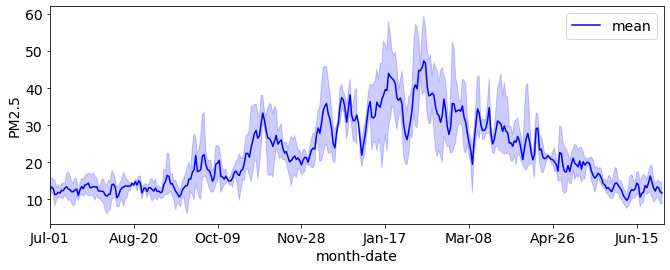

In [51]:
pollutant = 'PM2.5'
offset = 182
agg = 'max' # or 'mean'
roll = True 
# tag the season year 
df, winter_day_dict = season_avg(dataset.poll_df, cols=[pollutant], roll=roll, agg=agg, offset=offset)
df = add_season(df, start_month='-12-01', end_month='-03-30')


_, ax = plt.subplots(1,1, figsize=(11,4),sharex=True)

winter_day_dict, meandf = plot_season_avg(dataset.poll_df, 'PM2.5', ax, label='mean')


In [53]:
df.head(50)

,PM2.5,dayofyear,year,winter_day,month_day,season
datetime,,,,,,
2016-12-06,32.000000,341,2016,159,Dec-06,winter_2016
2016-12-07,36.208333,342,2016,160,Dec-07,winter_2016
2016-12-08,37.875000,343,2016,161,Dec-08,winter_2016
2016-12-09,42.625000,344,2016,162,Dec-09,winter_2016
2016-12-10,46.083333,345,2016,163,Dec-10,winter_2016
2016-12-11,46.458333,346,2016,164,Dec-11,winter_2016
2016-12-12,47.041667,347,2016,165,Dec-12,winter_2016
2016-12-13,40.875000,348,2016,166,Dec-13,winter_2016
2016-12-14,41.958333,349,2016,167,Dec-14,winter_2016


In [54]:
dataset.wea.head()

,datetime,Time,Temperature(C),Dew_Point(C),Humidity(%),Wind,Wind_Speed(kmph),Wind_Gust(kmph),Pressure(hPa),Precip.(mm),Condition
0,2016-01-01 00:00:00,12:00 AM,25.0,17.22,65.0,NNE,13.0,0.0,982.0,0.0,Partly Cloudy
1,2016-01-01 00:30:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
2,2016-01-01 01:00:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
3,2016-01-01 01:30:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy
4,2016-01-01 02:00:00,12:30 AM,24.0,17.22,65.0,NE,10.0,0.0,982.0,0.0,Partly Cloudy


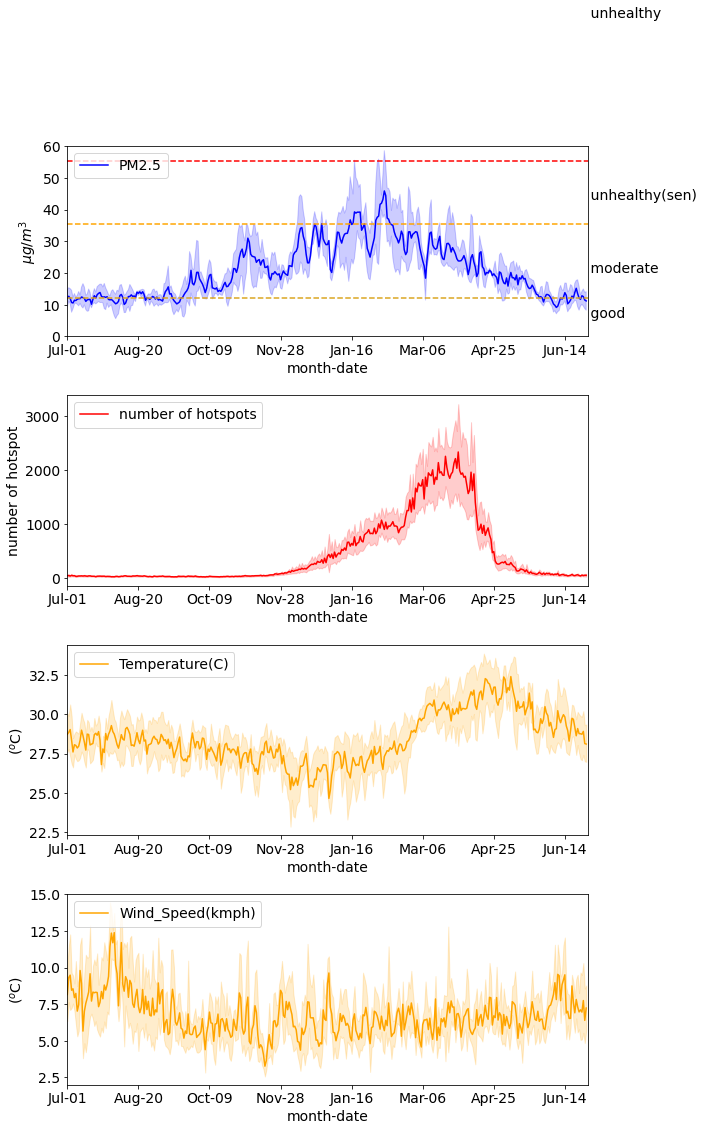

In [59]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0, 60])
ax[-1].set_ylim([2, 15])
for a in ax:
    new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    
    a.set_xticklabels(new_ticks)

#plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

In [61]:
dataset.fire.head()

,latitude,longitude,confidence,long_km,lat_km,distance,country,power,count,degree,spot_direct
datetime,,,,,,,,,,,
2002-07-04 13:01:00,9.7457,107.9835,67,12020.668234,1090.155871,654.811193,NaN,29.40,1,-36.0,E
2002-07-04 13:03:00,14.4216,102.8814,67,11452.705060,1622.630475,155.684083,Thailand,120.96,1,103.0,N
2002-07-04 13:04:00,19.8946,105.1144,52,11701.281483,2260.549021,817.848793,Vietnam,20.52,1,75.0,N
2002-07-04 13:04:00,20.3829,104.9449,48,11682.412829,2318.446282,869.460493,Vietnam,13.50,1,77.0,N
2002-07-04 13:04:00,20.3938,104.9437,91,11682.279246,2319.740760,870.692428,Vietnam,132.30,1,77.0,N


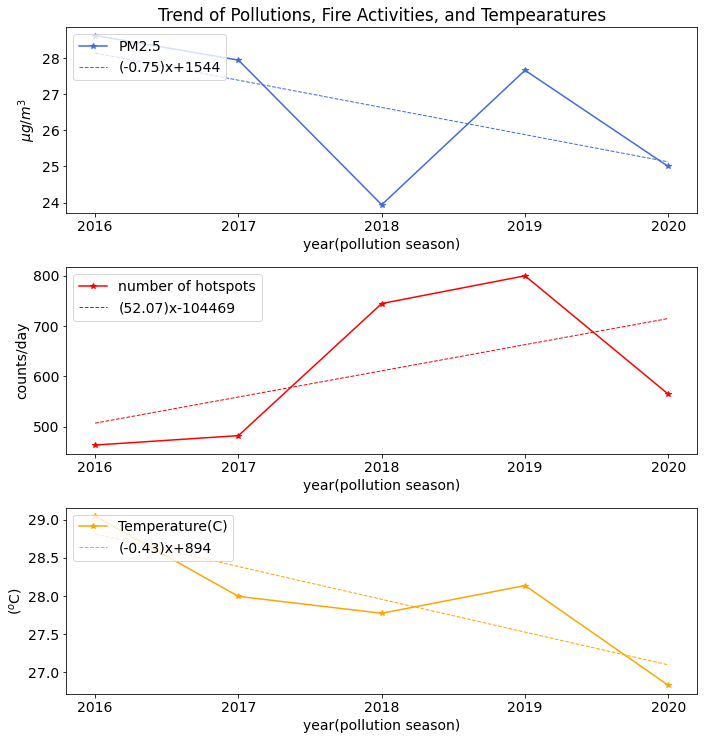

In [60]:
ax, year_avg, year_avg_std = plot_yearly_ln(dataset, min_year=2016, max_year=2021, err_bar=False)


# Model Training

In [3]:
# init a dataset object and build the data from scratch 
# only perform this when new data files are added 
dataset = Dataset('Battambang')

use default meta
--------------- first index  2016-12-06 11:00:00
=================find the best RF model=================
best rf score  0.18971490995345971
val score after op_rf {'val_r2_score': 0.6485, 'val_r2': 0.8, 'val_mean_squared_error': 70.3638, 'val_mean_absolute_error': 6.434, 'val_mean_absolute_percentage_error': 29.5937, 'val_median_absolute_error': 3.9775}
test score after op_rf {'test_r2_score': 0.5618, 'test_r2': 0.8178, 'test_mean_squared_error': 66.3982, 'test_mean_absolute_error': 6.4763, 'test_mean_absolute_percentage_error': 50.2601, 'test_median_absolute_error': 5.658}
================ remove unncessary columns no lag=================


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [02:30<00:00,  4.56s/it]


score after dropping columns  {'r2_score': 0.6629, 'r2': 0.8031, 'mean_squared_error': 67.4902, 'mean_absolute_error': 6.3183, 'mean_absolute_percentage_error': 29.6689, 'median_absolute_error': 3.9566}
export figure as  C:/Users/Benny/Documents/Fern/aqi_thailand2/reports/battambang/_PM25_rf_fea_op2.png
================= find the best fire feature ===================
optimizing fire parameter using skopt optimizer. This will take about 4 hours
old fire parameter {'w_speed': 12.0, 'shift': -67, 'roll': 135, 'damp_surface': 1.0, 'wind_damp': False, 'wind_lag': False, 'split_direct': 0} is still better than optimized score =60.75851006535078
op fire give val score {'val_r2_score': 0.6965, 'val_r2': 0.7933, 'val_mean_squared_error': 60.7585, 'val_mean_absolute_error': 6.0675, 'val_mean_absolute_percentage_error': 30.526, 'val_median_absolute_error': 4.2157}
op fire give test score {'test_r2_score': 0.5949, 'test_r2': 0.837, 'test_mean_squared_error': 61.3797, 'test_mean_absolute_error': 6.

100%|████████████████████████████████████████████████████████████████████████████████| 117/117 [10:42<00:00,  5.49s/it]


score after dropping columns  {'r2_score': 0.7346, 'r2': 0.8208, 'mean_squared_error': 53.1543, 'mean_absolute_error': 5.6568, 'mean_absolute_percentage_error': 29.603, 'median_absolute_error': 3.9476}
best rf score  0.24640285908361143
val score after op6 {'val_r2_score': 0.7131, 'val_r2': 0.8037, 'val_mean_squared_error': 57.4795, 'val_mean_absolute_error': 5.9137, 'val_mean_absolute_percentage_error': 32.1325, 'val_median_absolute_error': 4.1821}
test score after op6  {'testop6_r2_score': 0.5928, 'testop6_r2': 0.8355, 'testop6_mean_squared_error': 61.5967, 'testop6_mean_absolute_error': 6.1788, 'testop6_mean_absolute_percentage_error': 47.7201, 'testop6_median_absolute_error': 5.4175}
final score for test set {'test_r2_score': 0.6111, 'test_r2': 0.8378, 'test_mean_squared_error': 58.8285, 'test_mean_absolute_error': 5.9838, 'test_mean_absolute_percentage_error': 45.852, 'test_median_absolute_error': 5.1229}
daily avg score for test set {'avg_test_r2_score': 0.6634, 'avg_test_r2': 0.

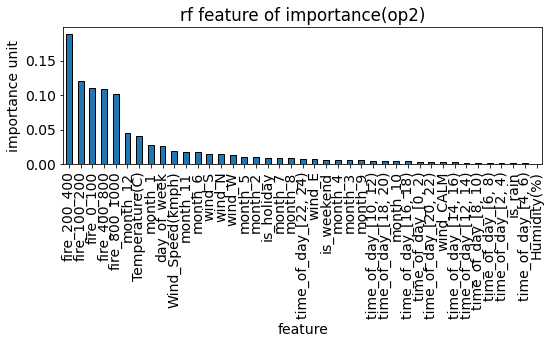

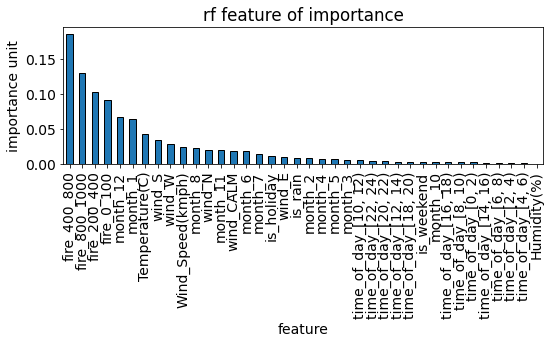

In [7]:
dataset, model, trainer = train_city_s1(city='Battambang', pollutant= 'PM2.5', add_weight=True, op_lag=True, choose_cat_hour=False, choose_cat_month=False, default_meta=True)

In [12]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Battambang', pollutant='PM2.5')

--------------- first index  2016-12-06 11:00:00
raw model performance {'test_r2_score': 0.6301, 'test_r2': 0.8461, 'test_mean_squared_error': 60.8387, 'test_mean_absolute_error': 6.058, 'test_mean_absolute_percentage_error': 45.1613, 'test_median_absolute_error': 5.1279}
daily avg training error {'avg_trn_r2_score': 0.8135, 'avg_trn_r2': 0.9108, 'avg_trn_mean_squared_error': 14.4468, 'avg_trn_mean_absolute_error': 2.8317, 'avg_trn_mean_absolute_percentage_error': 14.807, 'avg_trn_median_absolute_error': 2.0374}
daily avg test error {'avg_test_r2_score': 0.673, 'avg_test_r2': 0.8785, 'avg_test_mean_squared_error': 49.4854, 'avg_test_mean_absolute_error': 5.5985, 'avg_test_mean_absolute_percentage_error': 41.0534, 'avg_test_median_absolute_error': 4.731}


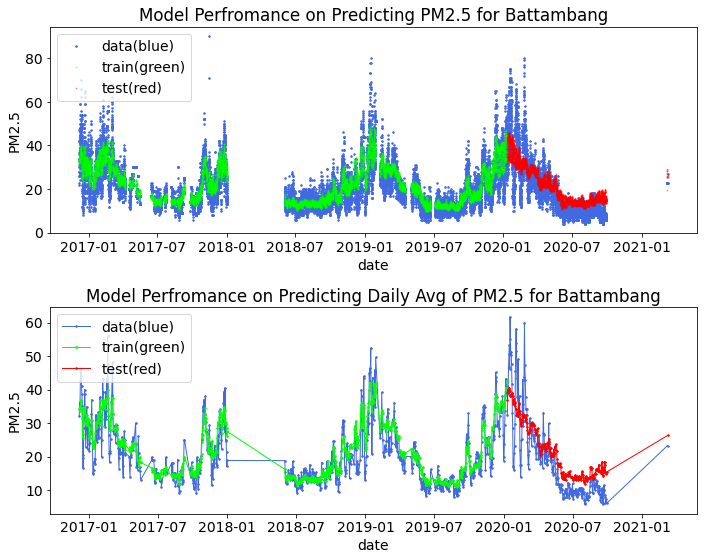

In [13]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], xlim=[], to_save=True)

# Takeo

In [7]:
# init a dataset object and build the data from scratch 
# only perform this when new data files are added 
dataset = Dataset('Takeo')

# build pollution,  weather data and (optional) fire data
dataset.build_all_data( build_fire=True, build_holiday=True)

Averaging data from 1 stations


  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

Loading all hotspots data. This might take sometimes


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:29<00:00,  1.10it/s]


before drop (2521019, 20)
after drop (2477734, 12)


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:31<00:00,  1.05it/s]


before drop (2521019, 20)
after drop (2477734, 12)
Getting holiday for  cambodia


In [13]:
# init a dataset object and build the data from scratch 
# only perform this when new data files are added 
dataset = Dataset('Takeo')
dataset.load_()

In [14]:
# Extract the pollution data 
poll_df = dataset.poll_df
city_name = dataset.city_name

In [15]:
poll_df.head()

,PM2.5
datetime,
2018-02-05 08:00:00,45.0
2018-02-05 09:00:00,51.0
2018-02-05 10:00:00,43.0
2018-02-05 11:00:00,43.0
2018-02-05 12:00:00,51.0


pollutants to plot Index(['PM2.5'], dtype='object')


(0.0, 100.0)

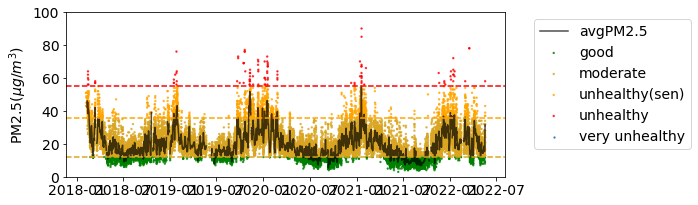

In [16]:
# looking at the raw data
ax = plot_all_pollutions(poll_df, city_name=city_name, filename=dataset.report_folder +'all_poll.png')
ax.set_ylim([0, 100])

PM2.5    138.208333
dtype: float64


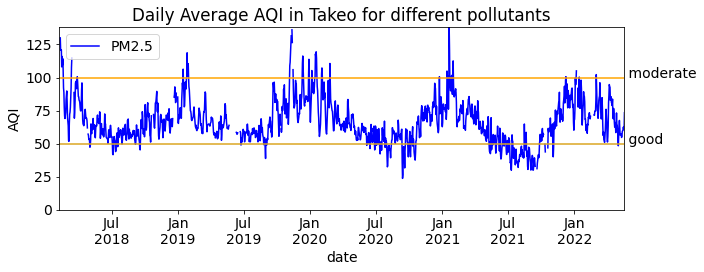

In [18]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

Text(0, 0.5, 'number of hotspots')

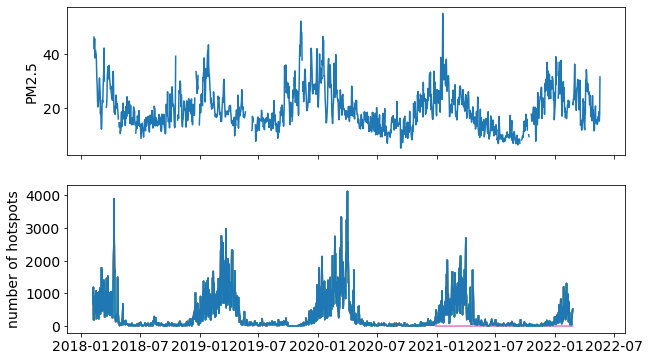

In [19]:
df = dataset.fire.resample('d').count().loc[dataset.poll_df.index.min(): dataset.poll_df.index.max()]
poll_d = dataset.poll_df.resample('d').mean()
_, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax[0].plot(poll_d)
ax[0].set_ylabel('PM2.5')

ax[1].plot(df)
ax[1].set_ylabel('number of hotspots')

aqi 100 in  Jan-14 to Jan-21


(25.0, 150.0)

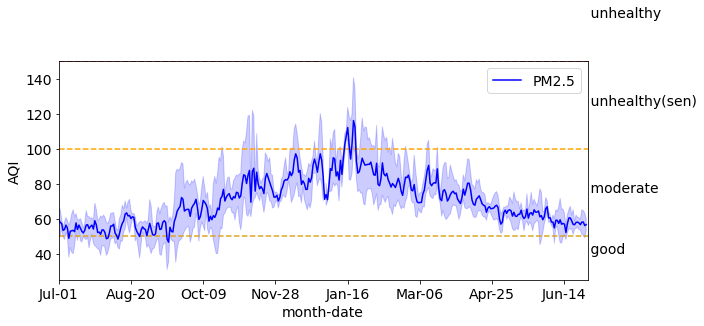

In [23]:
ax, winterday_dict = plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5')
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)
ax.set_ylim([25, 150])
#plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25_aqi.png')

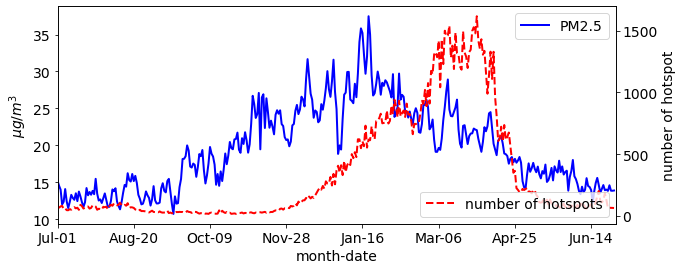

In [25]:
_, ax = plt.subplots(1,1, figsize=(10,4),sharex=True)
#poll_aqi = poll_to_aqi(data.poll_df.copy(), data.roll_dict)
winter_day_dict, mean_day = plot_season_avg(dataset.poll_df.copy(), 'PM2.5', ax, plot_error=False, roll=True, agg='mean',linewidth=2, draw=True )

ax.set_ylabel('$\mu g/m^3$')
#new_ticks = ax.get_xticklabels()
ax1 = ax.twinx()
fire_hour = dataset.fire[['count']].resample('d').sum()
fire_hour.columns = ['number of hotspots']
winter_day_dict, fire_mean_day = plot_season_avg(fire_hour.copy(), 'number of hotspots', ax1, plot_error=False, roll=False, agg='mean',color='red',linestyle='dashed',linewidth=2)

ax1.legend(loc='lower right')
ax1.set_ylabel('number of hotspot')
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)           
plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

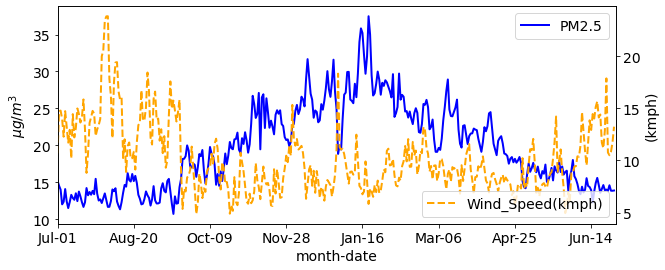

In [26]:
_, ax = plt.subplots(1,1, figsize=(10,4),sharex=True)
#poll_aqi = poll_to_aqi(data.poll_df.copy(), data.roll_dict)
winter_day_dict, mean_day = plot_season_avg(dataset.poll_df.copy(), 'PM2.5', ax, plot_error=False, roll=True, agg='mean',linewidth=2, draw=True )
ax.set_ylabel('$\mu g/m^3$')

#new_ticks = ax.get_xticklabels()
ax1 = ax.twinx()
winter_day_dict, wind_mean = plot_season_avg(dataset.wea, 'Wind_Speed(kmph)', ax1, plot_error=False, roll=False, agg='mean',color='orange',linestyle='dashed',linewidth=2)

ax1.legend(loc='lower right')
ax1.set_ylabel('(kmph)')
#ax1.set_ylim([2, 12])
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)    
plt.savefig(dataset.report_folder + 'wind_PM25_season.png')

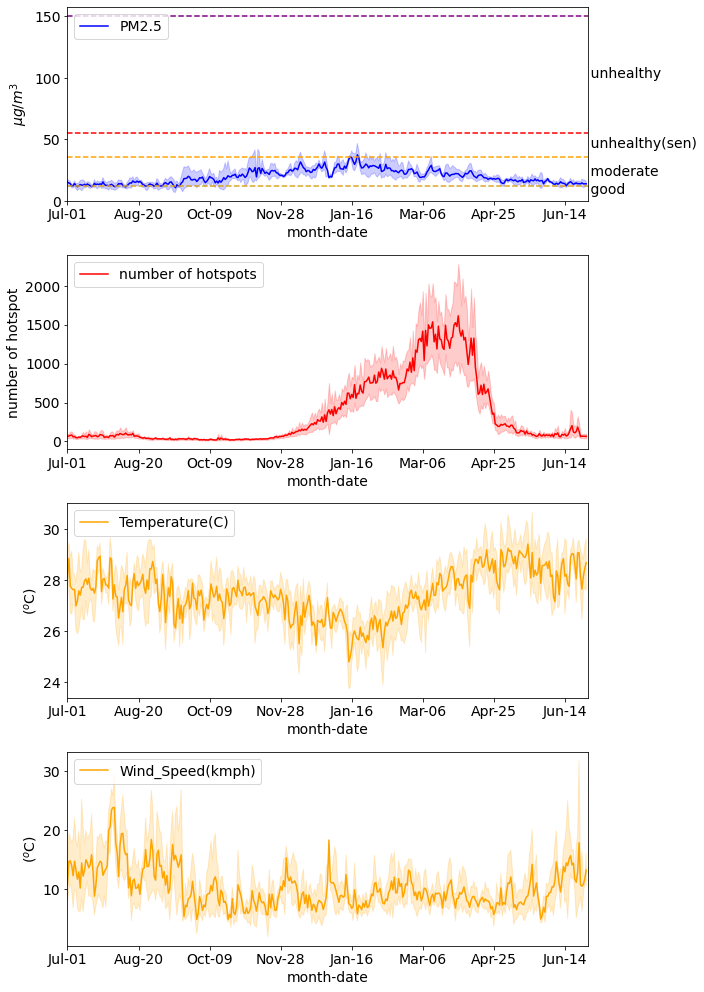

In [29]:
ax = compare_seson_avg(dataset, agg='mean')
#ax[-1].set_ylim([2, 15])
for a in ax:
    new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    
    a.set_xticklabels(new_ticks)

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

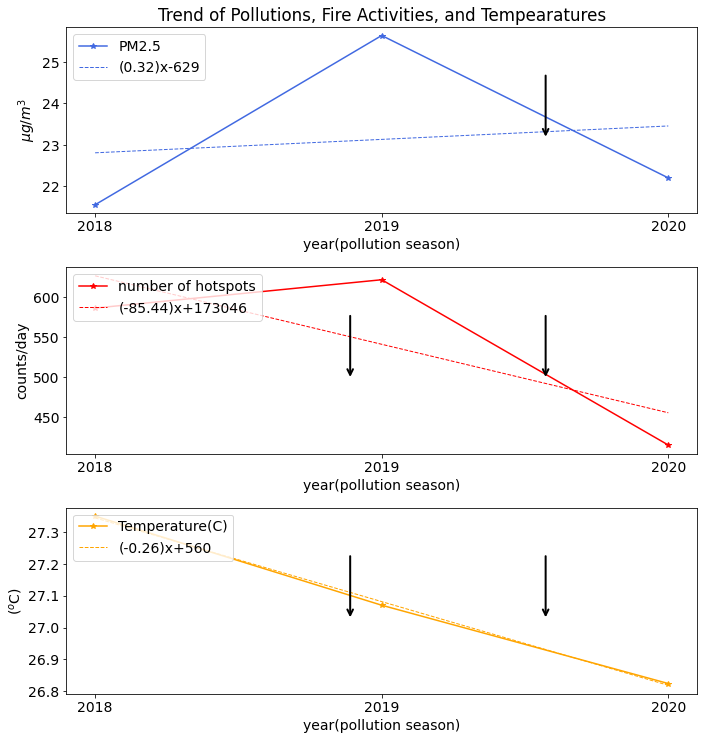

In [28]:
ax, year_avg, year_avg_std = plot_yearly_ln(dataset, min_year=2018, max_year=2020, err_bar=False)

for i, a in enumerate(ax):
    if i != 3:
        a.annotate('', xy=(0.76, 0.4),xytext=(0.76, 0.75), xycoords='axes fraction',
               horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))

ax[1].annotate('', xy=(0.45, 0.4),xytext=(0.45, 0.75), xycoords='axes fraction',
               horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))
ax[2].annotate('', xy=(0.45, 0.4),xytext=(0.45, 0.75), xycoords='axes fraction',
               horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))

#ax[0].set_ylim([30,50])
#ax[1].set_ylim([40, 110])
#ax[2].set_ylim([600, 1300])
#ax[3].set_ylim([24.5, 26.5])


plt.savefig(dataset.report_folder + 'compare_ln_trends.png')

In [33]:
dataset.feature_no_fire()

--------------- first index  2018-02-05 08:00:00


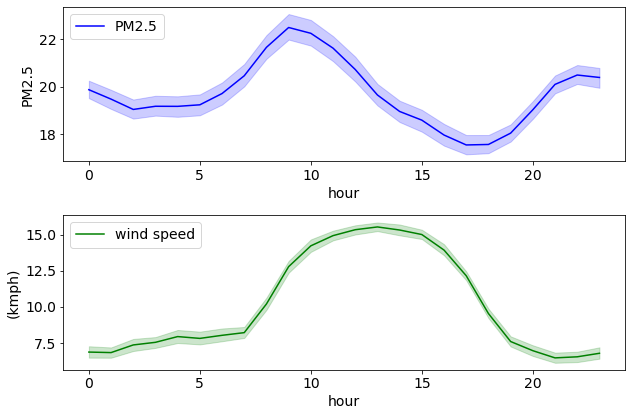

In [35]:
_, ax = plt.subplots(2, 1, figsize=(9, 6))
plot_hour_avg(dataset.data_no_fire, 'Wind_Speed(kmph)', ax[1],  color='green', label='wind speed')
#ax[0].set_title('Compare hourly behavior between wind speed and pollution levels')
plot_hour_avg(dataset.poll_df, 'PM2.5', ax[0],  color='blue')
#plot_hour_avg(dataset.poll_df, 'NO2', ax[2],  color='blue')

ax[1].set_ylabel('(kmph)')
plt.tight_layout()
plt.savefig(dataset.report_folder + 'hourly_behaviors.png')

# Train Model Takeo

In [36]:
dataset = Dataset('Takeo')

In [ ]:
filename = dataset.model_folder + 'PM25_model_meta.json'
model_meta = load_meta(filename)
model_meta['rolling'] = 1
model_meta['zone_list'] = [0, 100, 200, 400, 800, 1000]
save_meta(filename, model_meta)
dataset, model, trainer = train_city_s1(city='Takeo', pollutant='PM2.5', instr='MODIS',
                                        add_weight=True, to_op_fire_zone=True, op_lag=True, choose_cat_hour=True, choose_cat_month=False)